In [11]:
import sys
# import pyqtgraph as pg
import cnmodel as cnm
from cnmodel.protocols import IVCurve, VCCurve
from neuron import h
import matplotlib.pyplot as plt

## Single Cell with Injected Current

In [2]:
temperature = 34.
cell = cnm.cells.Pyramidal.create(model='POK',
                                      ttx=False, nach=None)
cell.set_temperature(float(temperature))

In [3]:
v0 = cell.find_i0(showinfo=True)
iv = IVCurve()
iv.run({'pulse': [(0, 0.05, 0.01)]},
       cell, durs=[400, 500, 400],
       sites=None, reppulse=None, temp=float(temperature))
# result = iv.input_resistance_tau()
# print('    From IV: Rin = {:7.1f}  Tau = {:7.1f}  Vm = {:7.1f}'.format(result['slope'], result['tau'], result['intercept']))
# iv.show(cell=cell)

# if sys.flags.interactive == 0:  # keeps application alive for display of data
#     pg.QtGui.QApplication.exec_()


  [soma] find_i0  Species: rat  cell type: pyramidal  Temp   32.0
    *** found V0 = -62.496552
    *** and cell has mechanisms:  ['napyr', 'kdpyr', 'kif', 'kis', 'ihpyr', 'leak']


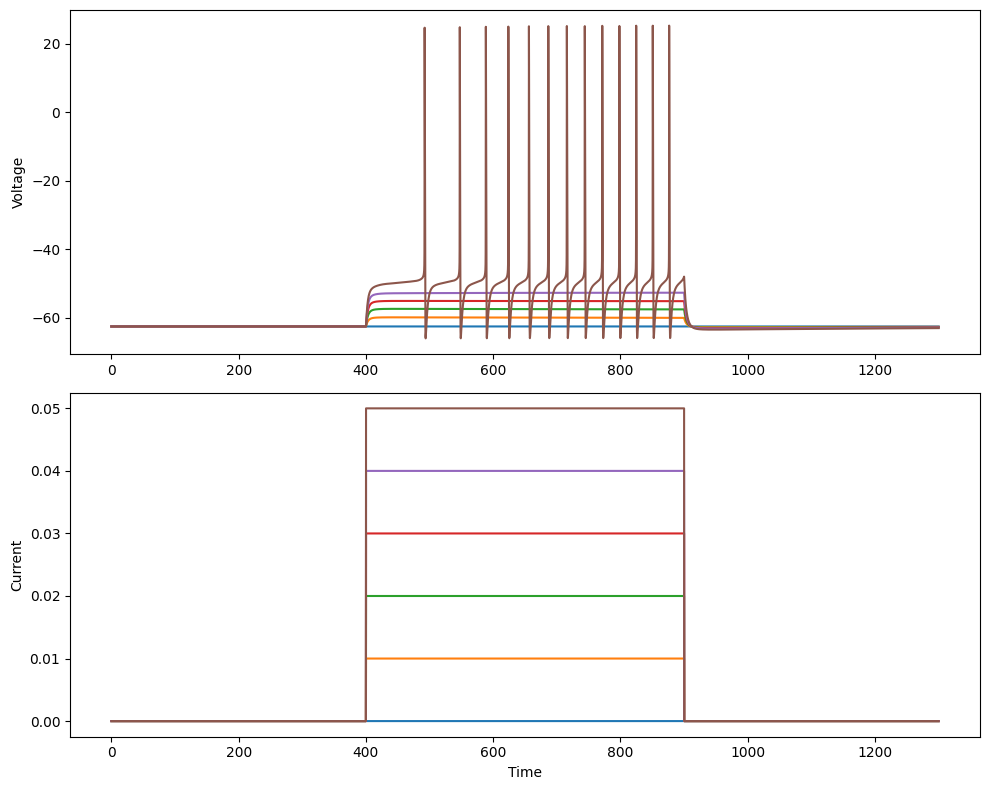

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(2,1, figsize=(10,8))
axs.ravel()

for i, voltage_trace in enumerate(iv.voltage_traces):

    axs[0].plot(iv.time_values, voltage_trace)
    axs[1].plot(iv.time_values, iv.current_traces[i])

# plt.plot(iv.voltage_traces[0], iv.current_traces[0])
axs[0].set_ylabel('Voltage')
axs[1].set_ylabel('Current')
axs[1].set_xlabel('Time')

fig.tight_layout()

## Two Cells: 
### Injected Current -> SGC -> Pyramidal

In [4]:
pre_cell = cnm.cells.SGC.create()
post_cell = cnm.cells.Pyramidal.create()

In [10]:
n_synapses = 10

synapses = []
for i in range(n_synapses):

    synapses.append(pre_cell.connect(post_cell, type='simple'))

In [11]:
# vc_amp = -65
# vclamp = h.VClamp(0.5, sec=post_cell.soma)
# vclamp.dur[i] = 200
# vclamp.amp[0] = vc_amp

In [12]:
istim = h.iStim(0.5, sec=pre_cell.soma)
stim = {
    'NP': 10,
    'Sfreq': 100.0,
    'delay': 10.0,
    'dur': 0.5,
    'amp': 10.0,
    'PT': 0.0,
    'dt': 0.025,
}

(secmd, maxt, tstims) = cnm.util.make_pulse(stim)

istim.delay = 0
istim.dur = 1e9
istim.iMax = 0.0

i_stim_ve = h.Vector(secmd)
i_stim_ve.play(istim._ref_i, 0.025, 0)

Vector[28]

In [13]:
h.tstop = 200
h.celsius = 34
h.dt = 0.025

In [14]:
v_pre = h.Vector().record(pre_cell.soma(0.5)._ref_v)
v_post = h.Vector().record(post_cell.soma(0.5)._ref_v)
t = h.Vector().record(h._ref_t)
# i_vc = h.Vector().record(vclamp._ref_i)
cnm.util.custom_init()
h.run()

0.0

Text(0.5, 1.0, 'Post')

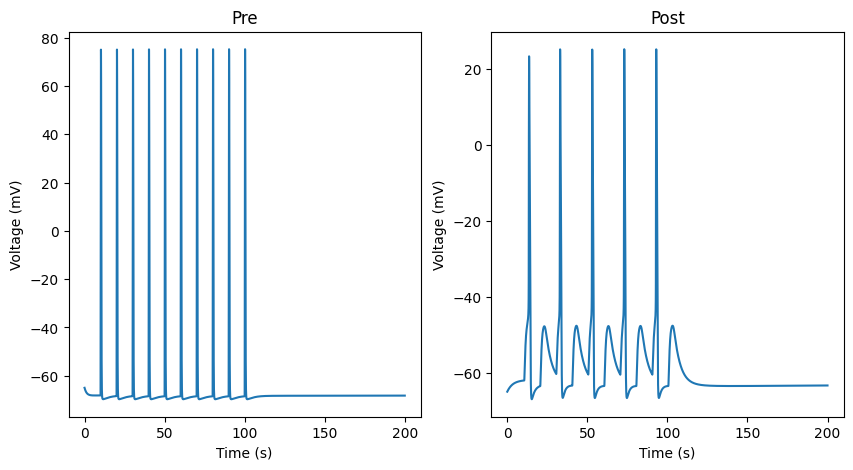

In [15]:
%matplotlib inline

fig, axs = plt.subplots(1,2,figsize=(10,5))
axs.ravel()

axs[0].plot(t, v_pre)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Voltage (mV)')
axs[0].set_title('Pre')

axs[1].plot(t, v_post)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Voltage (mV)')
axs[1].set_title('Post')

## Excitatory and Inhibitory Cells
### SGC_1 -> PYR_1
### SGC_1 -> TCV_1 -> PYR_2

In [2]:
sgc_cell = cnm.cells.SGC.create()
pyr_cell1 = cnm.cells.Pyramidal.create()
pyr_cell2 = cnm.cells.Pyramidal.create()
tcv_cell = cnm.cells.Tuberculoventral.create()

getcellpars: modelType:  TVmouse


In [3]:
n_synapses = 10

synapses = []
for i in range(n_synapses):
    
    synapses.append(sgc_cell.connect(pyr_cell1, type='simple'))

    synapses.append(sgc_cell.connect(tcv_cell, type='simple'))
    synapses.append(tcv_cell.connect(pyr_cell2, type='simple'))

In [ ]:
# vclamp = h.VClamp(0.5, sec=pyr_cell2.soma)
# vclamp.dur[0] = 200
# vclamp.amp[0] = 20

In [4]:
istim = h.iStim(0.5, sec=sgc_cell.soma)
stim = {
    'NP': 10,
    'Sfreq': 100.0,
    'delay': 10.0,
    'dur': 0.5,
    'amp': 10.0,
    'PT': 0.0,
    'dt': 0.025,
}

(secmd, maxt, tstims) = cnm.util.make_pulse(stim)

istim.delay = 0
istim.dur = 1e9
istim.iMax = 0.0

i_stim_ve = h.Vector(secmd)
i_stim_ve.play(istim._ref_i, 0.025, 0)

Vector[0]

In [5]:
h.tstop = 200
h.celsius = 34
h.dt = 0.025

v_sgc = h.Vector().record(sgc_cell.soma(0.5)._ref_v)
v_pyr1 = h.Vector().record(pyr_cell1.soma(0.5)._ref_v)
v_pyr2 = h.Vector().record(pyr_cell2.soma(0.5)._ref_v)
v_tcv = h.Vector().record(tcv_cell.soma(0.5)._ref_v)
t = h.Vector().record(h._ref_t)
# i_vc = h.Vector().record(vclamp._ref_i)
cnm.util.custom_init()
h.run()

0.0

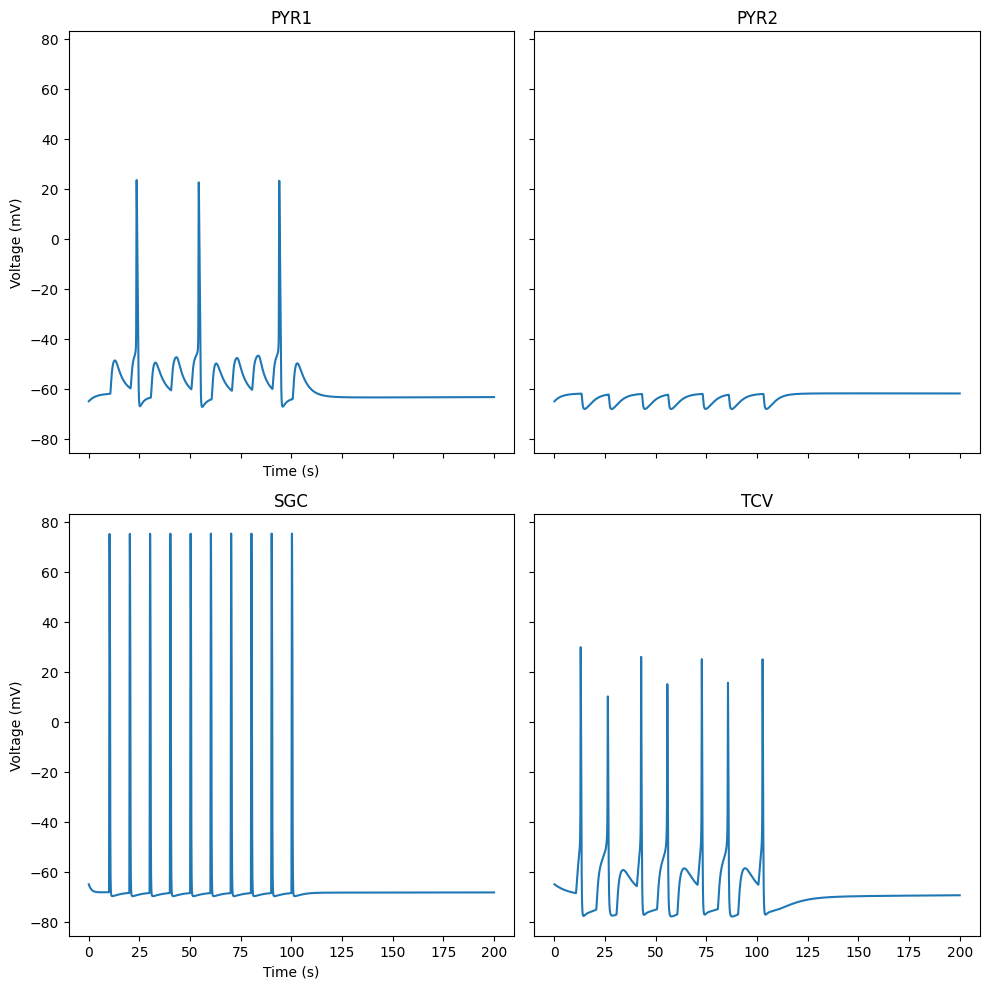

In [9]:
%matplotlib inline

fig, axs = plt.subplots(2,2,figsize=(10,10), sharex=True, sharey=True)

axs[0,0].plot(t, v_pyr1)
axs[0,0].set_xlabel('Time (s)')
axs[0,0].set_ylabel('Voltage (mV)')
axs[0,0].set_title('PYR1')

axs[0,1].plot(t, v_pyr2)
# axs[0,1].set_xlabel('Time (s)')
# axs[0,1].set_ylabel('Voltage (mV)')
axs[0,1].set_title('PYR2')


axs[1,0].plot(t, v_sgc)
axs[1,0].set_xlabel('Time (s)')
axs[1,0].set_ylabel('Voltage (mV)')
axs[1,0].set_title('SGC')

axs[1,1].plot(t, v_tcv)
# axs[1,1].set_xlabel('Time (s)')
# axs[1,1].set_ylabel('Voltage (mV)')
axs[1,1].set_title('TCV')

fig.tight_layout()

## Populations of Cells

In [14]:
from cnmodel import populations

In [15]:
sgc_pop = populations.SGC()
pyr_pop = populations.Pyramidal()

In [16]:
sgc_pop.connect(pyr_pop)

In [17]:
sgc_cell_ids = sgc_pop.select(5, cf=16e3, create=True)
pyr_cell_ids = pyr_pop.select(5, cf=16e3, create=True)

In [18]:
sgc_pop.resolve_inputs(depth=2)
pyr_pop.resolve_inputs(depth=2)

In [20]:
sgc_cells = sgc_pop.cells[sgc_cell_ids]
pyr_cells = pyr_pop.cells[pyr_cell_ids]

In [23]:
sgc_cells[0][1]

In [24]:
# TODO: run simulation and plot cells